In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import astropy.wcs as WCS
from astropy.table import Table
from astropy import units as u

import warnings
warnings.filterwarnings("ignore")

## The reference of the Example data 

'Example_C18O.fits' is the $C^{18}O$ ($J = 1-0$) emission line of the Milky Way Imaging Scroll Painting (MWISP) within $11.7^{\circ} \leq l \leq 13.4^{\circ}$, $0.22^{\circ} \leq b \leq 1.05^{\circ}$ and 5 km s$^{-1}$ $\leq v \leq$ 35 km s$^{-1}$. 

MWISP project is a multi-line survey in $^{12}CO$/$^{13}CO$/$C^{18}O$ along the northern galactic plane with PMO-13.7m telescope.

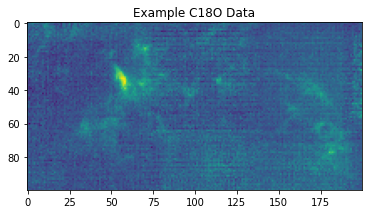

In [2]:
path_Example_C18O = 'Example_C18O.fits'
example_data_C18O = fits.getdata(path_Example_C18O)
plt.title('Example C18O Data')
plt.imshow(example_data_C18O.sum(0))
plt.show()

## Installation and Usage of FacetClumps

In [3]:
# pip install FacetClumps==0.0.7

import FacetClumps
from FacetClumps.Detect_Files import Detect as DF_FacetClumps

## Detection Paremeters

### Input of FacetClumps (2D and 3D)
**RMS**: The RMS of the data.

**Threshold**: The minimum intensity used to truncate the signals.

Default Value: 2\*RMS 

Recommended value: ['mean','otsu',n\*RMS]

**SWindow**: The scale of window function.

Default Value: 3

Recommended value: [3,5,7]

**KBins**: The coefficient used to calculate the number of bins for the eigenvalue.

Default Value: 35

Recommended value: [10,...,60]



**FwhmBeam**: The FWHM of the instrument beam, in pixels.

Default Value: 2

**VeloRes**: The velocity resolution of the instrument, in channels.

Default Value: 2

**SRecursionLBV**: The minimum area of a region in the spatial direction and the minimum length of a region in the velocity channels when a recursion terminates. Clumps also need to satisfy the conditions. [SRecursionLB,SRecursionV] for 3D, [SRecursionLB] for 2D.

Default Value: [16,5]

**file_name**: File name.

**mask_name**: mask name, used to store region information. The index (starts with the number one) of each clump corresponds to the same number in the mask.

**outcat_name**: Used to store clump table in pixel coordinate system.

**outcat_wcs_name**: Used to store clump table in WCS coordinate system.

### Output information
**files**: Regional information and clump tables saved according to the customized file name.

**did_tables**: Detected information dictionary, whose keys is **[mask, outcat_table, outcat_wcs_table]**

**mask**: Regional infromation.

**outcat_table**: Clump table of pixel coordinate system.

**outcat_wcs_table**: Clump table of WCS coordinate system.

In [4]:
#Get the RMS from the header
header = fits.getheader(path_Example_C18O)
RMS = header['RMS']
print('RMS:',RMS)

RMS: 0.196804


In [5]:
#2D, PP Space

RMS = 0.23
Threshold = 2 * RMS # ['mean','otsu',n*RMS]
SWindow = 3 # [3,5,7]
KBins = 35 # [10,...,60]
FwhmBeam = 2
VeloRes = 2
SRecursionLBV = [16, 5] # [(2+FwhmBeam)**2,3+VeloRes]

parameters = [RMS, Threshold, SWindow, KBins, FwhmBeam, VeloRes, SRecursionLBV]

SRecursionLB = SRecursionLBV[0]
did_FacetClumps = FacetClumps.FacetClumps_2D_Funs.Detect_FacetClumps(RMS, Threshold, SWindow, KBins,SRecursionLB,example_data_C18O.sum(0))
regions_data = did_FacetClumps['regions_data']
clump_number = regions_data.max()
print('Number:',clump_number)

## Decect the file.
# file_name = '   '
# mask_name = 'mask.fits'
# outcat_name = 'outcat.csv'
# outcat_wcs_name = 'outcat_wcs.csv'
# did_tables_FacetClumps = DF_FacetClumps(file_name,parameters,mask_name,outcat_name,outcat_wcs_name)

100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


Number: 250.0


In [6]:
#3D, PPV Space

RMS = 0.23
Threshold = 2 * RMS # ['mean','otsu',n*RMS]
SWindow = 3 # [3,5,7]
KBins = 35 # [10,...,60]
FwhmBeam = 2
VeloRes = 2
SRecursionLBV = [16, 5] # [(2+FwhmBeam)**2,3+VeloRes]

parameters = [RMS, Threshold, SWindow, KBins, FwhmBeam, VeloRes, SRecursionLBV]
file_name = path_Example_C18O
mask_name = 'mask.fits'
outcat_name = 'outcat.csv'
outcat_wcs_name = 'outcat_wcs.csv'
did_tables_FacetClumps = DF_FacetClumps(file_name,parameters,mask_name,outcat_name,outcat_wcs_name)

100%|██████████| 33/33 [00:01<00:00, 29.60it/s]


Number: 173
Time: 32.19


In [7]:
# Obtain the reginal information, clump table of pixel coordinate system and WCS coordinate system from files.
regions_data = fits.getdata('mask.fits')
outcat_table = Table.read('outcat.csv')
outcat_wcs_table = Table.read('outcat_wcs.csv')

# Obtain the reginal information, clump table of pixel coordinate system and WCS coordinate system from retrun.
regions_data = did_tables_FacetClumps['mask']
outcat_table = did_tables_FacetClumps['outcat_table']
outcat_wcs_table = did_tables_FacetClumps['outcat_wcs_table']

In [8]:
print('Outcat_Pix_Table:\n',outcat_table)

Outcat_Pix_Table:
  ID Peak1 Peak2 Peak3   Cen1   Cen2  ... Size3  Peak   Sum    Volume Angle Edge
     pix   pix   pix    pix    pix   ...  pix                  pix    deg      
--- ----- ----- ----- ------- ------ ... ----- ----- -------- ------ ----- ----
  1   197    17    13 196.746 16.921 ... 1.289 1.453   47.274     79    27    1
  2    63    38    75  62.502 38.000 ... 4.384 2.923 1298.702   1375    86    0
  3    72    38    76  69.770 38.082 ... 3.147 2.506  779.211    836    50    0
  4    67    47    71  66.451 46.229 ... 2.759 2.214  535.663    634   -43    0
  5    58    39    80  56.282 31.927 ... 2.396 2.607  509.990    701    76    0
  6    54    31    73  54.504 30.156 ... 1.530 1.359   68.938    109    51    0
  7    79    45    76  79.598 45.148 ... 2.434 1.886  191.926    310   -59    0
  8    73    42    78  72.025 42.473 ... 2.673 1.528  215.345    332    39    0
  9    71    16    76  70.998 16.500 ... 3.925 3.731 1120.997   1123   -87    0
 10    67    14    84

In [9]:
print('Outcat_WCS_Table:\n',outcat_wcs_table)

Outcat_WCS_Table:
  ID Peak1  Peak2 Peak3   Cen1   Cen2 ... Size3   Peak   Sum    Volume Angle Edge
     deg    deg  km / s  deg    deg  ... km / s   K   K km / s  pix    deg      
--- ------ ----- ------ ------ ----- ... ------ ----- -------- ------ ----- ----
  1 11.733 0.350  7.359 11.735 0.349 ...  0.215 1.453    7.879     79    27    1
  2 12.850 0.525 17.693 12.854 0.525 ...  0.731 2.923  216.460   1375    86    0
  3 12.775 0.525 17.860 12.794 0.526 ...  0.525 2.506  129.875    836    50    0
  4 12.817 0.600 17.027 12.821 0.594 ...  0.460 2.214   89.281    634   -43    0
  5 12.892 0.533 18.527 12.906 0.474 ...  0.399 2.607   85.002    701    76    0
  6 12.925 0.467 17.360 12.921 0.460 ...  0.255 1.359   11.490    109    51    0
  7 12.717 0.583 17.860 12.712 0.585 ...  0.406 1.886   31.989    310   -59    0
  8 12.767 0.558 18.193 12.775 0.562 ...  0.446 1.528   35.893    332    39    0
  9 12.783 0.342 17.860 12.783 0.346 ...  0.654 3.731  186.842   1123   -87    0
 10 12.81

#### Detection Plots

In [10]:
# Obtain the required information from output tables.
clump_centers = np.c_[outcat_table['Cen1'],outcat_table['Cen2'],outcat_table['Cen3']]
clump_angles = outcat_table['Angle']
clump_edges = outcat_table['Edge']

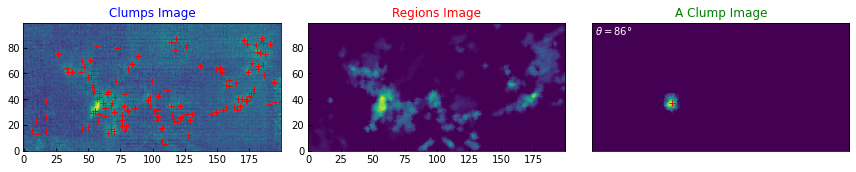

In [16]:
origin_data = example_data_C18O

fig,(ax0,ax1,ax2)= plt.subplots(1,3, figsize=(12, 8))
for i in range(np.int(regions_data.max())):
    # Show the clumps which do not touch the edges.
    if clump_edges[i] == 0:
        center_x = clump_centers[i][0]-1
        center_y = clump_centers[i][1]-1
        ax0.plot(center_x,center_y,'r+')

#Obtain the region and angle of a clump. 
index = 1
clump_region_i_coords = np.where(regions_data == index+1)
clump_region_lable = np.zeros_like(origin_data)
clump_region_lable[clump_region_i_coords] = 1
ax2.text(2,origin_data.shape[1]-10,r'$\theta={}\degree$'.format(np.around(clump_angles[index],0)),color='white',fontsize=10 )
ax2.plot(clump_centers[index][0]-1,clump_centers[index][1]-1,'r+')

ax0.imshow(origin_data.sum(0))
ax1.imshow(regions_data.sum(0))
ax2.imshow(clump_region_lable.sum(0))
ax0.set_title('Clumps Image',fontsize=12,color='b')
ax1.set_title('Regions Image',fontsize=12,color='r')
ax2.set_title('A Clump Image',fontsize=12,color='g')
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
for ax in [ax0,ax1,ax2]:
    ax.invert_yaxis()
fig.tight_layout()
plt.xticks([]),plt.yticks([])
plt.show()

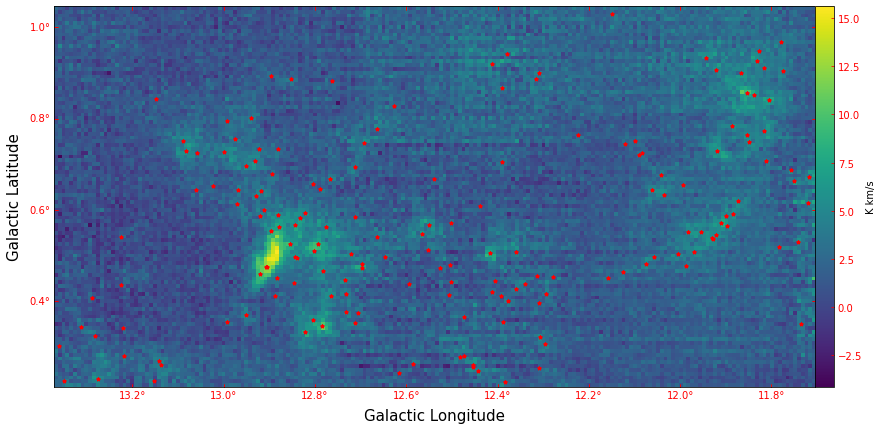

In [18]:
data_cube = fits.getdata(path_Example_C18O)
data_header = fits.getheader(path_Example_C18O)
wcs = WCS.WCS(data_header)

fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(111,projection=wcs.celestial)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.color'] = 'red'
plt.rcParams['ytick.color'] = 'red'
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 15,
}
plt.xlabel("Galactic Longitude",font2)
plt.ylabel("Galactic Latitude",font2)


for i in range(len(clump_centers)):
    center_x = clump_centers[i][0]-1
    center_y = clump_centers[i][1]-1
    ax.plot(center_x,center_y,'r*',markersize = 4) 

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_major_formatter("d.d")
lat.set_major_formatter("d.d")
lon.set_ticks(spacing=12 * u.arcmin)

gci = plt.imshow(data_cube.sum(axis=0)*0.166)#,cmap='gray'
cbar = plt.colorbar(gci,pad=0)
cbar.set_label('K km/s')
# plt.xticks([]),plt.yticks([])
# plt.savefig('Example_0.pdf', format='pdf', dpi=1000)
plt.show()